In [280]:
import numpy as np
import pandas as pd
from IMPJ import DataProcessor
import random
import matplotlib.pyplot as plt
from os.path import basename, exists
import matplotlib as mpl

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')


In [281]:
data = pd.read_csv('..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)
rdgdata = pd.read_csv('..\\Fermi-LAT Data\\ML_Results_withrdg.csv',index_col=0)
print(rdgdata.columns)

Index(['Frac_Variability', 'HR_24', 'Signif_Avg', 'Pivot_Energy', 'HR_35',
       'HR_37', 'LP_Flux_Density', 'HR_36', 'HR_47', 'HR_57',
       'PLEC_ExpfactorS', 'HR_46', 'CLASS1', 'y_pred', 'y_probs_bll',
       'y_probs_fsrq'],
      dtype='object')


In [282]:
  '''
        In 'data' all unknown BCUs are assigned 0. 
        All BLLs are assigned 1 and all FSRQs are assigned 2.
        Radio Galaxies = 3 and Other = 4

        The function will mask all values except the 2 desired classes
        '''

pl_index = np.array(data['PL_Index'])
lp_index = np.array(data['LP_Index'])
plec_index = np.array(data['PLEC_IndexS'])
pl = np.array(data['PL'])
lp = np.array(data['LP'])
plec = np.array(data['PLEC'])
classes = np.array(data['CLASS1'])
pivotenergies = np.array(data['Pivot_Energy'])

index = np.zeros(len(pl_index))
for i in range(0,len(pl_index)):
    if pl[i] == 1:
        index[i] = pl_index[i]
    elif lp[i] == 1:
        index[i] = lp_index[i]
    elif plec[i] == 1:
        index[i] == plec_index[i]
    else:
        print('Error')

rdg = np.array([])
bll = np.array([])
fsrq = np.array([])
rdgpe = np.array([]) #rdg pivot energy
bllpe = np.array([])
fsrqpe=np.array([])
rdgpreds = np.array([])
bllpreds = np.array([])
fsrqpreds = np.array([])

for i in range(0,len(classes)):
    if classes[i] == 1:
        bll = np.append(bll,index[i])
        bllpe = np.append(bllpe,pivotenergies[i])
    elif classes[i] == 2:
        fsrq = np.append(fsrq,index[i])
        fsrqpe = np.append(fsrqpe,pivotenergies[i])
    elif classes[i] == 3:
        rdg = np.append(rdg,index[i])
        rdgpe = np.append(rdgpe,pivotenergies[i])
    elif classes[i] == 4:
        pass
    else:
        print('Error')


Text(0.5, 0, 'Photon Index')

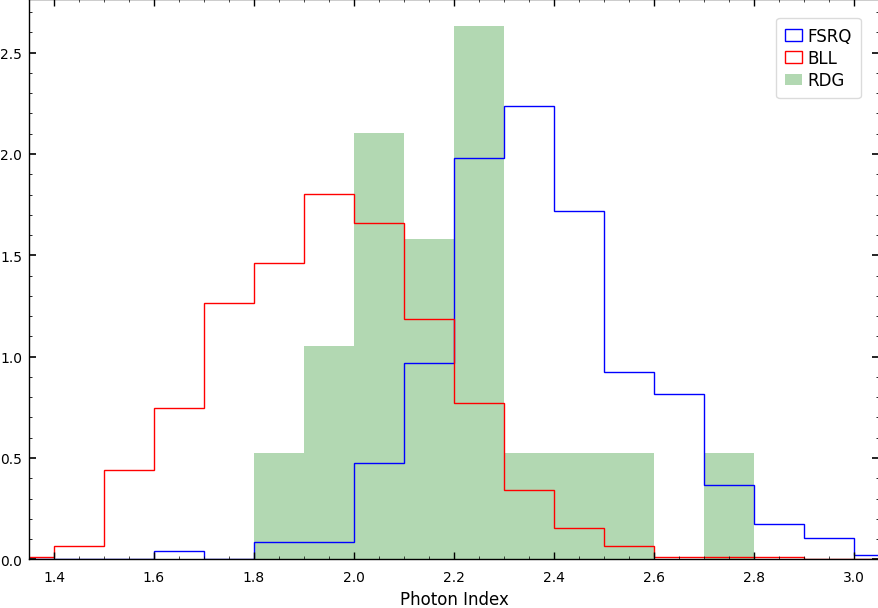

In [283]:

fig, ax = plt.subplots(figsize = (10,7))
#ax2 = ax.twinx()
ax.hist(fsrq,histtype='step',bins = np.arange(1.3,3.2,0.1),color='blue',density=True,label = 'FSRQ')
ax.hist(bll,histtype='step',bins = np.arange(1.3,3.2,0.1),color='red',density=True,label='BLL')
ax.hist(rdg,histtype='stepfilled',bins = np.arange(1.3,3.2,0.1),color='green',density=True,alpha=0.3,label='RDG')
ax.legend(fontsize=12)
ax.set_xbound(1.35,3.05)
ax.set_xlabel('Photon Index',fontsize=12)

Text(0.5, 0, 'Log(Pivot Energy)')

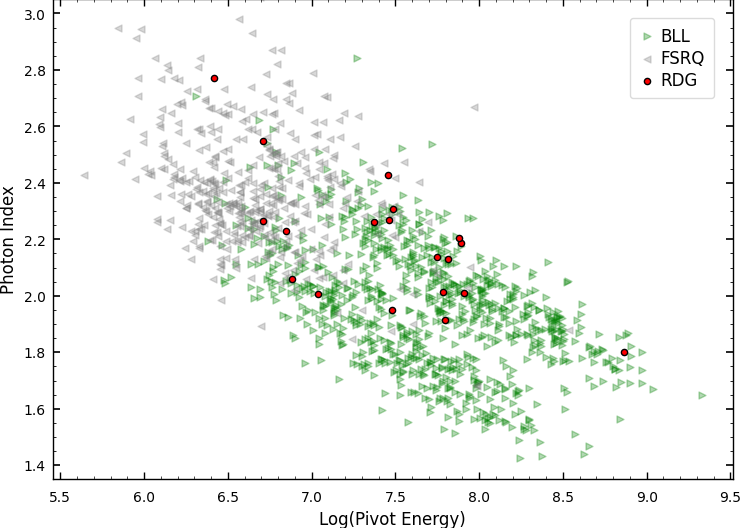

In [284]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(np.log(bllpe),bll,color='green',marker = '>',alpha=0.3,label='BLL')
ax.scatter(np.log(fsrqpe),fsrq,color='grey',marker = '<',alpha = 0.3,label='FSRQ')
ax.scatter(np.log(rdgpe),rdg,color='red',marker='o',s=20,edgecolors='black',label='RDG')
ax.set_ybound(1.35,3.05)
ax.legend(fontsize=12)
ax.set_ylabel('Photon Index',fontsize=12)
ax.set_xlabel('Log(Pivot Energy)',fontsize=12)

Text(0.5, 0, 'Probability of being classified as a BLL')

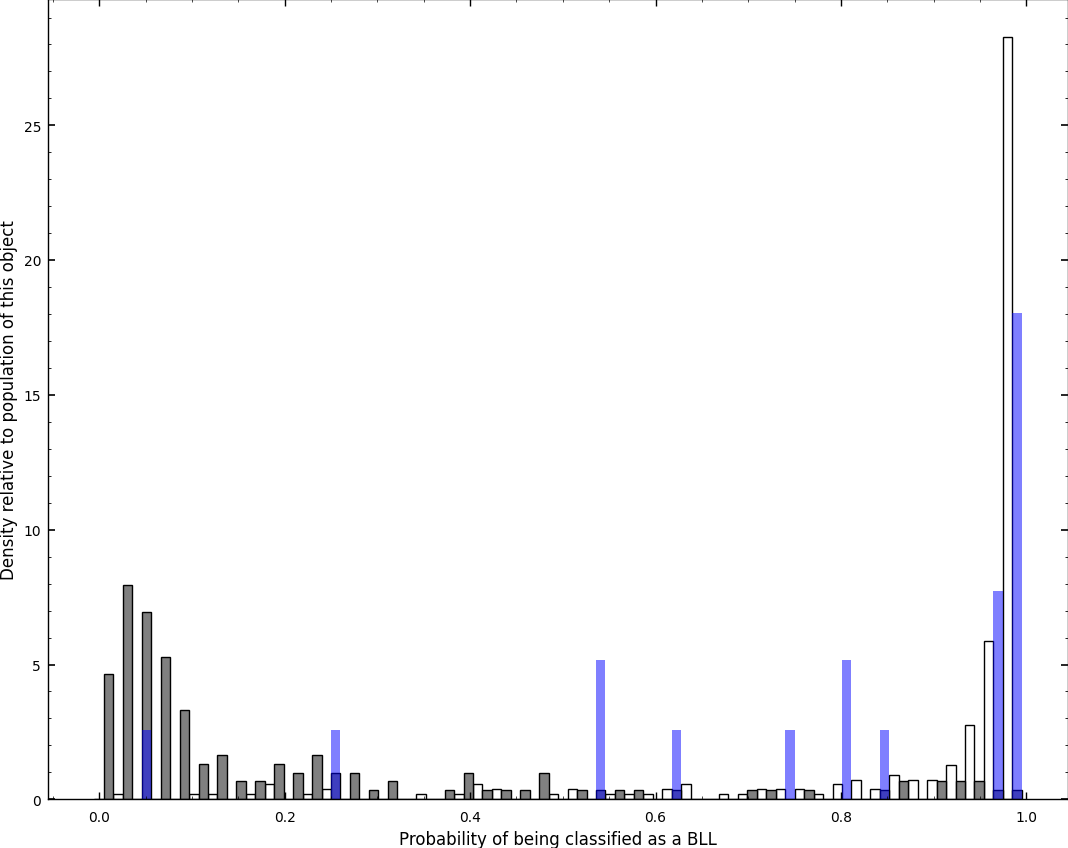

In [285]:
y_probs = np.array(rdgdata['y_probs_bll'])
classes = np.array(rdgdata['CLASS1'])
bllprobs = np.array([])
fsrqprobs = np.array([])
rdgprobs = np.array([])
allprobs=np.array([])

for i in range(0,len(classes)):
    if classes[i] == 0:
        bllprobs=np.append(bllprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 1:
        fsrqprobs=np.append(fsrqprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 3:
        rdgprobs = np.append(rdgprobs,y_probs[i])
    else:
        print('Error')

fig, ax = plt.subplots(figsize=(12,10))
ax.hist(bllprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='left',edgecolor='black',color='white')
ax.hist(fsrqprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='mid',edgecolor='black',color='gray')
ax.hist(rdgprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),color='blue',alpha=0.5,rwidth=0.5)
ax.set_ylabel('Density relative to population of this object',fontsize=12)
ax.set_xlabel('Probability of being classified as a BLL',fontsize=12)


In [286]:
btwn1090 = np.array([])
btwn2080 = np.array([])
btwn3070 = np.array([])
btwn4060 = np.array([])

for i in range(0,len(y_probs)):
    if y_probs[i] > 0.4 and y_probs[i] < 0.6:
        btwn4060 = np.append(btwn4060,classes[i])
        btwn3070 = np.append(btwn3070,classes[i])
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])
    elif y_probs[i] > 0.3 and y_probs[i] < 0.7:
        btwn3070 = np.append(btwn3070,classes[i])
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])    
    elif y_probs[i] > 0.2 and y_probs[i] < 0.8:
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])
    elif y_probs[i] > 0.1 and y_probs[i] < 0.9:
        btwn1090 = np.append(btwn1090,classes[i])

rdg1090 = np.count_nonzero(btwn1090 == 3)
rdg2080 = np.count_nonzero(btwn2080 == 3)
rdg3070 = np.count_nonzero(btwn3070 == 3)
rdg4060 = np.count_nonzero(btwn4060 == 3)
rdgoverall = np.count_nonzero(classes == 3)

percent1090 = (rdg1090/len(btwn1090))*100
percent2080 = (rdg2080/len(btwn2080))*100
percent3070 = (rdg3070/len(btwn3070))*100
percent4060 = (rdg4060/len(btwn4060))*100
percentoverall = (rdgoverall/len(classes))*100

print(f'Between probabilities of 0.1 and 0.9, {rdg1090} RDGs make up {percent1090}% of the sample of {len(btwn1090)}')
print(f'Between probabilities of 0.2 and 0.8, {rdg2080} RDGs make up {percent2080}% of the sample of {len(btwn2080)}')
print(f'Between probabilities of 0.3 and 0.7, {rdg3070} RDGs make up {percent3070}% of the sample of {len(btwn3070)}')
print(f'Between probabilities of 0.4 and 0.6, {rdg4060} RDGs make up {percent4060}% of the sample of {len(btwn4060)}')
print(f'The overall percentage of RDGs in the sample is {percentoverall}% of {len(classes)} (rerun all if not 434)')

''' RUN THIS CELL IN ORDER. THE CELL BELOW IS CAUSING PROBLEMS!!!!!!!!!!!!!!!!!!!!!!!!!!'''

Between probabilities of 0.1 and 0.9, 8 RDGs make up 6.837606837606838% of the sample of 117
Between probabilities of 0.2 and 0.8, 6 RDGs make up 8.333333333333332% of the sample of 72
Between probabilities of 0.3 and 0.7, 3 RDGs make up 7.5% of the sample of 40
Between probabilities of 0.4 and 0.6, 2 RDGs make up 7.6923076923076925% of the sample of 26
The overall percentage of RDGs in the sample is 4.377880184331797% of 434 (rerun all if not 434)


' RUN THIS CELL IN ORDER. THE CELL BELOW IS CAUSING PROBLEMS!!!!!!!!!!!!!!!!!!!!!!!!!!'

(267,)

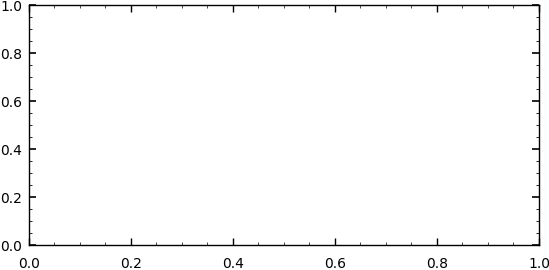

In [291]:
bll_feat = np.array([])
fsrq_feat = np.array([])
rdg_feat = np.array([])

complete = pd.merge(data,rdgdata, right_index=True,left_index=True, how = 'inner')
# All 'data' columns are now followed by _x and all 'rdgdata' columns are followed by _y UNLESS they are unique

feat = np.array(complete['Pivot_Energy_x'])
classes1 = np.array(complete['CLASS1_x'])

for i in range(0,len(classes1)):
    if classes1[i] == 1:
        bll_feat = np.append(bll,feat[i])
    elif classes1[i] == 2:
        fsrq_feat = np.append(fsrq,feat[i])
    elif classes1[i] == 3:
        rdg_feat = np.append(rdg,feat[i])
    elif classes1[i] == 4:
        pass
    else:
        print('Error')
    
    
fig, ax = plt.subplots()

bllprobs.shape
#ax.scatter(bll,bllprobs)

